# Getting Started with Scimap

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 26 23:11:32 2020
@author: Ajit Johnson Nirmal
Scimap Getting Started tutorial
"""

'\nCreated on Fri Jun 26 23:11:32 2020\n@author: Ajit Johnson Nirmal\nScimap Getting Started tutorial\n'

In [9]:
# Before you start make sure you have installed the following packages
# pip install scimap
# pip install scanpy
# pip install leidenalg
# pip install PyQt5

## Tutorial material

You can download the material for this tutorial from the following [link:](https://www.dropbox.com/s/rra13zir52o9hio/getting_started%20and%20phenotyping.zip?dl=0)  
The presentation files are available [here:](https://github.com/ajitjohnson/Jupyter-Notebooks/blob/master/tutorials/scimap_tutorial/getting_started%20and%20phenotyping/scimap_tutorial.pdf)

## Tutorial video

In [33]:
from IPython.display import HTML
HTML('<iframe width="450" height="250" src="https://www.youtube.com/embed/knh5elRksUk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [27]:
# Load necessary libraries
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)

# Import Scimap
import scimap as sm

In [12]:
# Set the working directory
os.chdir ("/Users/aj/Desktop/scimap_tutorial/")

## Load data using AnnData

In [29]:
# Load data
data = pd.read_csv ('counts_table.csv') # Counts matrix
meta = pd.read_csv ('meta_data.csv') # Meta data like x and y coordinates 

# combine the data and metadata file to generate the AnnData object
adata = ad.AnnData (data)
adata.obs = meta

Print adata to check for it's content

In [14]:
adata

AnnData object with n_obs × n_vars = 4825 × 48
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation'

In [15]:
adata.obs # prints the meta data

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
0,511.555556,9.846154,117,14.532270,10.273628,0.707261,0.959016,0.750000,-0.695369
1,579.330097,9.398058,103,16.056286,8.776323,0.837396,0.903509,0.613095,1.115707
2,630.958333,12.883333,120,15.222005,10.310756,0.735653,0.975610,0.681818,0.151616
3,745.194631,16.275168,149,14.380200,13.404759,0.362027,0.967532,0.662222,-0.270451
4,657.173653,18.035928,167,17.675831,12.110106,0.728428,0.943503,0.695833,-0.810890
...,...,...,...,...,...,...,...,...,...
4820,559.597403,1091.577922,154,18.150307,11.683288,0.765281,0.900585,0.570370,-0.342315
4821,619.983871,1092.959677,248,21.734414,15.565820,0.697912,0.864111,0.551111,1.432242
4822,583.317073,1093.573171,82,12.060039,9.539789,0.611784,0.964706,0.630769,0.203023
4823,607.064394,1101.583333,264,22.549494,15.905321,0.708858,0.882943,0.661654,0.691838


In [16]:
adata.X # prints the counts table

array([[16640.564  ,   719.6325 ,   527.7094 , ...,  1085.735  ,
          218.54701,  3170.47   ],
       [16938.3    ,   686.5534 ,   469.30096, ...,  1075.6407 ,
          164.48544,  3116.767  ],
       [16243.542  ,   819.4167 ,   604.39166, ...,  1164.3917 ,
          227.74167,  3156.1084 ],
       ...,
       [28656.256  ,   878.2561 ,   585.3293 , ...,  1233.183  ,
         1243.5488 ,  3194.195  ],
       [22054.818  ,   685.8485 ,   424.85226, ...,  1031.2424 ,
          313.32574,  3038.8105 ],
       [23992.854  ,   850.25146,   529.89886, ...,  1000.5578 ,
          285.98267,  3087.3005 ]], dtype=float32)

In [17]:
adata.var[0:5] # prints the first 5 channel or marker names

""
DNA1
BG1
BG2
BG3
DNA2


You would have noticed that
- the data is not in log scale
- All the DNA channels are there
- The background channels are there
If we diretly perform clustering or any other type of analysis, the above mentioned factors may affect the results and so it is recommended to remove them.

## Load data using scimap's helper function

Use this if the single-cell data was generated using **mcmicro pipeline**. With this function though many of the above limitations can be imediately addressed. By default it removes DNA channels and you can pass any channel name into `drop_markers` parameter inorder to not import them.

In [18]:
image_path = ['/Users/aj/Desktop/scimap_tutorial/mcmicro_output.csv']
adata = sm.pp.mcmicro_to_scimap (image_path, drop_markers = ["PERK", "NOS2","BG1","BG2","BG3","ACTIN"])

Loading mcmicro_output.csv


Check adata contents now as we did previously

In [19]:
adata

AnnData object with n_obs × n_vars = 4825 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'imageid'
    uns: 'all_markers'

In [20]:
adata.X # Will now contain log normalized data

array([[6.3674684, 6.4287267, 7.3826084, ..., 6.990933 , 5.3915663,
        8.061951 ],
       [6.340171 , 6.094227 , 7.339796 , ..., 6.981601 , 5.1088834,
        8.044872 ],
       [6.503502 , 6.3549495, 7.4734573, ..., 7.0608125, 5.4325933,
        8.057412 ],
       ...,
       [6.5583014, 6.660794 , 7.4199724, ..., 7.1181645, 7.1265283,
        8.069404 ],
       [6.3370404, 6.281594 , 7.2397914, ..., 6.939489 , 5.7504296,
        8.01955  ],
       [6.3805585, 6.180567 , 7.2547846, ..., 6.909312 , 5.659422 ,
        8.035377 ]], dtype=float32)

In [21]:
adata.raw.X # contains the raw data

array([[ 581.5812 ,  618.38464, 1606.7778 , ..., 1085.735  ,  218.54701,
        3170.47   ],
       [ 565.8932 ,  442.29126, 1539.3981 , ..., 1075.6407 ,  164.48544,
        3116.767  ],
       [ 666.475  ,  574.3333 , 1759.6833 , ..., 1164.3917 ,  227.74167,
        3156.1084 ],
       ...,
       [ 704.0732 ,  780.1707 , 1667.9878 , ..., 1233.183  , 1243.5488 ,
        3194.195  ],
       [ 564.1212 ,  533.64014, 1392.803  , ..., 1031.2424 ,  313.32574,
        3038.8105 ],
       [ 589.2572 ,  482.2659 , 1413.8584 , ..., 1000.5578 ,  285.98267,
        3087.3005 ]], dtype=float32)

In [22]:
adata.obs # prints the meta data

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,imageid
mcmicro_output_1,511.555556,9.846154,117,14.532270,10.273628,0.707261,0.959016,0.750000,-0.695369,mcmicro_output
mcmicro_output_2,579.330097,9.398058,103,16.056286,8.776323,0.837396,0.903509,0.613095,1.115707,mcmicro_output
mcmicro_output_3,630.958333,12.883333,120,15.222005,10.310756,0.735653,0.975610,0.681818,0.151616,mcmicro_output
mcmicro_output_4,745.194631,16.275168,149,14.380200,13.404759,0.362027,0.967532,0.662222,-0.270451,mcmicro_output
mcmicro_output_5,657.173653,18.035928,167,17.675831,12.110106,0.728428,0.943503,0.695833,-0.810890,mcmicro_output
...,...,...,...,...,...,...,...,...,...,...
mcmicro_output_4821,559.597403,1091.577922,154,18.150307,11.683288,0.765281,0.900585,0.570370,-0.342315,mcmicro_output
mcmicro_output_4822,619.983871,1092.959677,248,21.734414,15.565820,0.697912,0.864111,0.551111,1.432242,mcmicro_output
mcmicro_output_4823,583.317073,1093.573171,82,12.060039,9.539789,0.611784,0.964706,0.630769,0.203023,mcmicro_output
mcmicro_output_4824,607.064394,1101.583333,264,22.549494,15.905321,0.708858,0.882943,0.661654,0.691838,mcmicro_output


### We can use scanpy package to explore the data

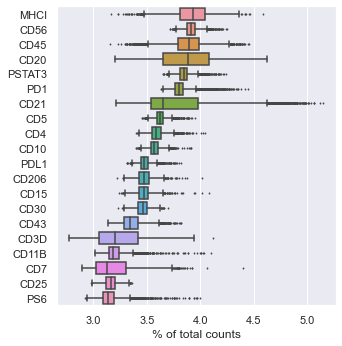

In [23]:
sc.pl.highest_expr_genes(adata, n_top=20, ) # Most expressing proteins

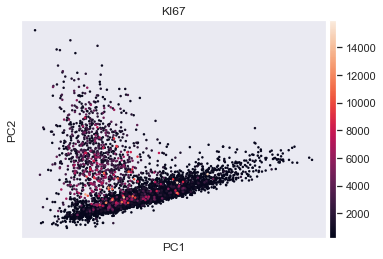

In [30]:
sc.tl.pca(adata, svd_solver='arpack') # peform PCA
sc.pl.pca(adata, color='KI67') # scatter plot in the PCA coordinates

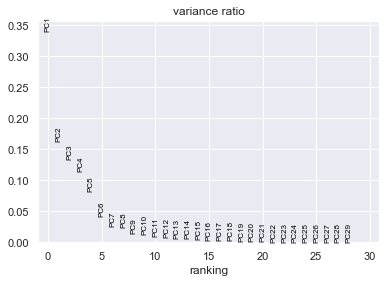

In [25]:
sc.pl.pca_variance_ratio(adata) # PCs to the total variance in the data

In [26]:
# Save the results
adata.write('tutorial_data.h5ad')

**This concludes the `getting started` tutorial, continue with the `phenotyping` tutorial.**